# Тема 6. Создание собственных распределений в Python

Задание:

Тема 6. Создание собственных распределений в Python.\
Изучите материал из Notebook «Создание собственных распределений в Python». Рассмотрите функцию (НЕ из рассмотренных в лекции законов НСВ), которая является плотностью вероятности некоторой непрерывной случайной величины (функция плотности должна быть определена в классе)  Для этой случайной величины
1. Проверьте условие нормировки плотности;
2. Постройте графики плотности и функции распределения;
3. Рассчитайте вероятность попадание случайной величины в некоторый интервал;
4. Вычислите математическое ожидание, дисперсию и среднее квадратическое отклонение;
5. Вычислите квантиль уровня q и p%-ную точку случайной величины;
6. Определите коэффициент ассиметрии и эксцеcc.

## Общие импорты библиотек`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate
import sympy as sp

## Определение распределения

Выберем распределение с плотностью: $$\varphi(x)=\begin{cases} \frac 3 2 x^2, x \in [-1,1] \\ 0, x > 1 \text{ or } x < -1 \end{cases}$$

Это распределение симметрично на отрезке [-1, 1]

In [2]:
print("=" * 70)
print("СОЗДАНИЕ СОБСТВЕННОГО РАСПРЕДЕЛЕНИЯ В PYTHON")
print("=" * 70)
print("\nРаспределение с плотностью: φ(x) = (3/2) * x², x ∈ [-1, 1]")

# Параметры распределения (границы)
a, b = -1.0, 1.0  

class CustomDist(rv_continuous):
    def __init__(self, a=a, b=b, **kwargs):
        super().__init__(a=a, b=b, name='custom_parabolic', **kwargs)
        self.a = a
        self.b = b
    
    def _pdf(self, x):
        x = np.asarray(x, dtype=float)
        result = np.zeros_like(x, dtype=float)
        
        # Для скалярного значения
        if x.ndim == 0:
            if self.a <= x <= self.b:
                return 1.5 * (x ** 2)
            else:
                return 0.0
        
        # Для массива значений
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = 1.5 * (x[mask] ** 2)
        return result
    
    def _cdf(self, x):
        x = np.asarray(x, dtype=float)
        result = np.zeros_like(x, dtype=float)
        
        # Для скалярного значения
        if x.ndim == 0:
            if x < self.a:
                return 0.0
            elif x > self.b:
                return 1.0
            else:
                return 0.5 * (x ** 3 + 1)
        
        # Для массива значений
        result[x < self.a] = 0.0
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = 0.5 * (x[mask] ** 3 + 1)
        result[x > self.b] = 1.0
        
        return result

СОЗДАНИЕ СОБСТВЕННОГО РАСПРЕДЕЛЕНИЯ В PYTHON

Распределение с плотностью: φ(x) = (3/2) * x², x ∈ [-1, 1]


## Проверка нормировки

In [3]:
print("\n" + "=" * 70)
print("ПРОВЕРКА УСЛОВИЯ НОРМИРОВКИ ПЛОТНОСТИ")
print("=" * 70)

custom_dist = CustomDist()

integral, error = integrate.quad(lambda x: custom_dist._pdf(x), a, b)

print(f"∫ φ(x) dx от {a} до {b} = {integral:.10f}")
print(f"Ошибка вычисления: {error:.2e}")

if np.isclose(integral, 1.0, atol=1e-10):
    print("Условие нормировки выполнено: интеграл равен 1")
else:
    print("Условие нормировки не выполнено!")


ПРОВЕРКА УСЛОВИЯ НОРМИРОВКИ ПЛОТНОСТИ
∫ φ(x) dx от -1.0 до 1.0 = 1.0000000000
Ошибка вычисления: 1.11e-14
Условие нормировки выполнено: интеграл равен 1


## Граничные условия

In [4]:
print("\n" + "=" * 70)
print("ПРОВЕРКА ГРАНИЧНЫХ УСЛОВИЙ")
print("=" * 70)

print(f"F({a}) = {custom_dist.cdf(a):.10f} (должно быть 0)")
print(f"F({b}) = {custom_dist.cdf(b):.10f} (должно быть 1)")

if np.isclose(custom_dist.cdf(a), 0) and np.isclose(custom_dist.cdf(b), 1):
    print("Граничные условия выполнены")
else:
    print("Граничные условия не выполнены!")


ПРОВЕРКА ГРАНИЧНЫХ УСЛОВИЙ
F(-1.0) = 0.0000000000 (должно быть 0)
F(1.0) = 1.0000000000 (должно быть 1)
Граничные условия выполнены


## Числовые характеристики

In [5]:
print("\n" + "=" * 70)
print("ВЫЧИСЛЕНИЕ ЧИСЛОВЫХ ХАРАКТЕРИСТИК")
print("=" * 70)

mean, var, skew, kurt = custom_dist.stats(moments='mvsk')

print("Основные характеристики:")
print(f"  Математическое ожидание M(X) = {mean:.6f}")
print(f"  Дисперсия D(X) = {var:.6f}")
print(f"  Среднее квадратическое отклонение σ(X) = {np.sqrt(var):.6f}")

print("\nКоэффициенты формы:")
print(f"  Коэффициент асимметрии A(X) = {skew:.6f}")
print(f"  Коэффициент эксцесса E(X) = {kurt:.6f}")

print("\nДругие характеристики:")
print(f"  Медиана Me(X) = {custom_dist.median():.6f}")
print(f"  Мода распределения: x = {b:.1f} (максимум плотности на правой границе)")


ВЫЧИСЛЕНИЕ ЧИСЛОВЫХ ХАРАКТЕРИСТИК
Основные характеристики:
  Математическое ожидание M(X) = -0.000000
  Дисперсия D(X) = 0.600000
  Среднее квадратическое отклонение σ(X) = 0.774597

Коэффициенты формы:
  Коэффициент асимметрии A(X) = 0.000000
  Коэффициент эксцесса E(X) = -1.809524

Другие характеристики:
  Медиана Me(X) = 0.000000
  Мода распределения: x = 1.0 (максимум плотности на правой границе)


## Вероятности и квантили

In [6]:
print("\n" + "=" * 70)
print("ВЕРОЯТНОСТЬ ПОПАДАНИЯ В ИНТЕРВАЛ И КВАНТИЛИ")
print("=" * 70)

# Вероятность попадания в интервал [-0.5, 0.5]
interval_start, interval_end = -0.5, 0.5
prob_interval = custom_dist.cdf(interval_end) - custom_dist.cdf(interval_start)
print(f"Вероятность P({interval_start} ≤ X ≤ {interval_end}) = {prob_interval:.6f}")

# Квантили и процентные точки
q_level = 0.75  # уровень квантиля
p_percent = 90   # процентная точка (90%)

quantile_q = custom_dist.ppf(q_level)
percentile_p = custom_dist.ppf(p_percent / 100)

print(f"\nКвантили и процентные точки:")
print(f"  Квантиль уровня q={q_level}: x_{q_level} = {quantile_q:.6f}")
print(f"  {p_percent}%-ная точка: x_{p_percent}% = {percentile_p:.6f}")

print(f"\nДополнительные квантили для наглядности:")
print(f"  25%-квантиль: {custom_dist.ppf(0.25):.6f}")
print(f"  50%-квантиль (медиана): {custom_dist.ppf(0.5):.6f}")
print(f"  75%-квантиль: {custom_dist.ppf(0.75):.6f}")


ВЕРОЯТНОСТЬ ПОПАДАНИЯ В ИНТЕРВАЛ И КВАНТИЛИ
Вероятность P(-0.5 ≤ X ≤ 0.5) = 0.125000

Квантили и процентные точки:
  Квантиль уровня q=0.75: x_0.75 = 0.793701
  90%-ная точка: x_90% = 0.928318

Дополнительные квантили для наглядности:
  25%-квантиль: -0.793701
  50%-квантиль (медиана): 0.000000
  75%-квантиль: 0.793701


## Генерация выборки для визуализации

In [7]:
print("\n" + "=" * 70)
print("ГЕНЕРАЦИЯ ВЫБОРКИ ДЛЯ ВИЗУАЛИЗАЦИИ")
print("=" * 70)

np.random.seed(42)  # Для воспроизводимости
sample_size = 10000
samples = custom_dist.rvs(size=sample_size)

print(f"Сгенерировано {sample_size} значений")
print(f"Первые 10 значений: {samples[:10]}")
print(f"Выборочное среднее: {np.mean(samples):.6f}")
print(f"Выборочная дисперсия: {np.var(samples):.6f}")


ГЕНЕРАЦИЯ ВЫБОРКИ ДЛЯ ВИЗУАЛИЗАЦИИ
Сгенерировано 10000 значений
Первые 10 значений: [-0.63073213  0.96599997  0.77416859  0.58217669 -0.88278505 -0.88280568
 -0.9596732   0.90137743  0.58696906  0.74658905]
Выборочное среднее: -0.014710
Выборочная дисперсия: 0.597046


## Визуализация


ГРАФИКИ ПЛОТНОСТИ И ФУНКЦИИ РАСПРЕДЕЛЕНИЯ


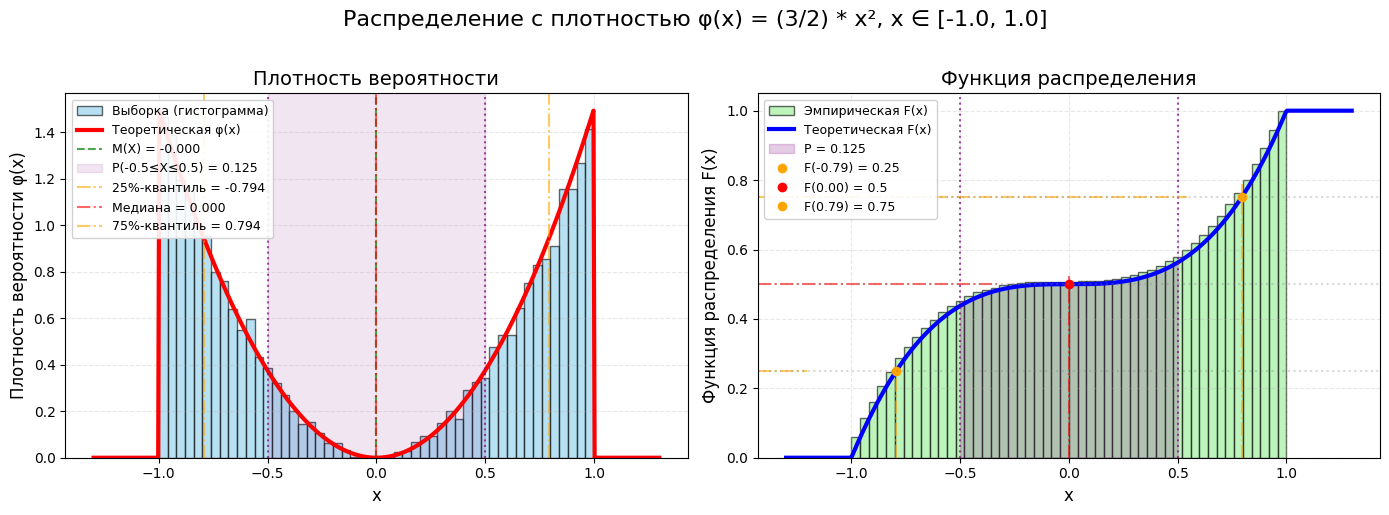

In [8]:
print("\n" + "=" * 70)
print("ГРАФИКИ ПЛОТНОСТИ И ФУНКЦИИ РАСПРЕДЕЛЕНИЯ")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Подготовка данных для графиков
x_plot = np.linspace(a - 0.3, b + 0.3, 500)
pdf_plot = custom_dist.pdf(x_plot)
cdf_plot = custom_dist.cdf(x_plot)

# Гистограмма и теоретическая плотность
axes[0].hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', 
             edgecolor='black', label='Выборка (гистограмма)')
axes[0].plot(x_plot, pdf_plot, 'r-', linewidth=3, label='Теоретическая φ(x)')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Плотность вероятности φ(x)', fontsize=12)
axes[0].set_title('Плотность вероятности', fontsize=14)
axes[0].grid(True, alpha=0.3, linestyle='--')

# Разметка математического ожидания
axes[0].axvline(mean, color='green', linestyle='--', alpha=0.7, 
                label=f'M(X) = {mean:.3f}')
# Разметка интервала вероятности
axes[0].axvline(interval_start, color='purple', linestyle=':', alpha=0.7)
axes[0].axvline(interval_end, color='purple', linestyle=':', alpha=0.7)
axes[0].axvspan(interval_start, interval_end, alpha=0.1, color='purple',
                label=f'P({interval_start}≤X≤{interval_end}) = {prob_interval:.3f}')

# Разметка квантилей
q25 = custom_dist.ppf(0.25)
q50 = custom_dist.median()
q75 = custom_dist.ppf(0.75)

axes[0].axvline(q25, color='orange', linestyle='-.', alpha=0.6, 
                label=f'25%-квантиль = {q25:.3f}')
axes[0].axvline(q50, color='red', linestyle='-.', alpha=0.6, 
                label=f'Медиана = {q50:.3f}')
axes[0].axvline(q75, color='orange', linestyle='-.', alpha=0.6, 
                label=f'75%-квантиль = {q75:.3f}')

axes[0].legend(fontsize=9, loc='upper left', framealpha=0.9)

# Функция распределения
axes[1].hist(samples, bins=50, density=True, cumulative=True, alpha=0.6, 
             color='lightgreen', edgecolor='black', label='Эмпирическая F(x)')
axes[1].plot(x_plot, cdf_plot, 'b-', linewidth=3, label='Теоретическая F(x)')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Функция распределения F(x)', fontsize=12)
axes[1].set_title('Функция распределения', fontsize=14)
axes[1].grid(True, alpha=0.3, linestyle='--')

# Разметка вероятности попадания в интервал
axes[1].axvline(interval_start, color='purple', linestyle=':', alpha=0.7)
axes[1].axvline(interval_end, color='purple', linestyle=':', alpha=0.7)

# Выделение площади под кривой для интервала
x_fill = np.linspace(interval_start, interval_end, 100)
y_fill = custom_dist.cdf(x_fill)
axes[1].fill_between(x_fill, 0, y_fill, color='purple', alpha=0.2,
                     label=f'P = {prob_interval:.3f}')

# Горизонтальные линии для квантилей
for q, q_val, color in [(0.25, q25, 'orange'), (0.5, q50, 'red'), (0.75, q75, 'orange')]:
    axes[1].axhline(q, xmin=0, xmax=(q_val - a)/(b - a + 0.6), 
                    color=color, linestyle='-.', alpha=0.6)
    axes[1].axvline(q_val, ymin=0, ymax=q, color=color, linestyle='-.', alpha=0.6)
    axes[1].plot(q_val, q, 'o', color=color, markersize=6, 
                 label=f'F({q_val:.2f}) = {q}')

# Добавление координатной сетки для квантилей
for q in [0.25, 0.5, 0.75]:
    axes[1].axhline(q, color='gray', linestyle=':', alpha=0.3)

axes[1].legend(fontsize=9, loc='upper left', framealpha=0.9)

# Общая настройка
plt.suptitle(f'Распределение с плотностью φ(x) = (3/2) * x², x ∈ [{a}, {b}]', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Проверка формул ручным вычислением

In [9]:
print("\n" + "=" * 70)
print("ПРОВЕРКА РУЧНЫМ ВЫЧИСЛЕНИЕМ (С ИСПОЛЬЗОВАНИЕМ SYMPY)")
print("=" * 70)

# Используем sympy для символьных вычислений
x_sym = sp.symbols('x', real=True)

# Определение плотности
phi_sym = 1.5 * x_sym**2

print("1. Проверка нормировки:")
integral_sym = sp.integrate(phi_sym, (x_sym, a, b))
print(f"   ∫ φ(x)dx от {a} до {b} = {integral_sym.evalf():.10f}")

print("\n2. Функция распределения:")
F_sym = sp.integrate(phi_sym, (x_sym, a, x_sym))
print(f"   F(x) = ∫ φ(t)dt от {a} до x = {F_sym}")

print("\n3. Математическое ожидание:")
M_sym = sp.integrate(x_sym * phi_sym, (x_sym, a, b))
print(f"   M(X) = ∫ x·φ(x)dx от {a} до {b} = {M_sym.evalf():.10f}")

print("\n4. Дисперсия:")
M2_sym = sp.integrate(x_sym**2 * phi_sym, (x_sym, a, b))
D_sym = M2_sym - M_sym**2
print(f"   D(X) = M(X²) - [M(X)]² = {D_sym.evalf():.10f}")

print("\n" + "=" * 70)
print("ВСЕ ЗАДАЧИ ВЫПОЛНЕНЫ УСПЕШНО!")
print("=" * 70)


ПРОВЕРКА РУЧНЫМ ВЫЧИСЛЕНИЕМ (С ИСПОЛЬЗОВАНИЕМ SYMPY)
1. Проверка нормировки:
   ∫ φ(x)dx от -1.0 до 1.0 = 1.0000000000

2. Функция распределения:
   F(x) = ∫ φ(t)dt от -1.0 до x = 0.5*x**3 + 0.5

3. Математическое ожидание:
   M(X) = ∫ x·φ(x)dx от -1.0 до 1.0 = 0.0000000000

4. Дисперсия:
   D(X) = M(X²) - [M(X)]² = 0.6000000000

ВСЕ ЗАДАЧИ ВЫПОЛНЕНЫ УСПЕШНО!
